# Gradient Boosting Example -- Kristofer Schobert

In this notebook, we will follow Thinkful's guided example of Gradient Boosting. We will build a Gradient Boosting Classifier that inputs the results of a survey and outputs whether or not the individual lives with a partner. We will change the parameters of this supervised learning model and observe how the models accuracy changes. 

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


We will follow Thinkful's guided example. We obtain the Type I and Type 2 errors as well as a plot of feature importance. 

In [45]:

# Importing our dataset
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [95]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


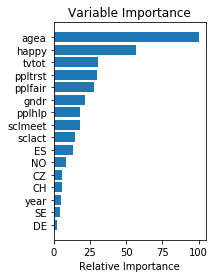

In [46]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function to 'deviance'.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

The percent type errors given convey the number of instances of that error divided by the total number of instances. Our model has fewer false positives than it does false negaitves. Our model is very good at predicting instances of a partner. It does alright at predicting instances of no partner. 

We also see from the Variable Importance plot that age is our model's strongest indicator of having a partner. Happiness is the second most important feature.

Here is the full confusion matrix for our training data:

In [54]:
table_train

col_0,0.0,1.0,All
partner,,,
0.0,4191,317,4508
1.0,1167,1657,2824
All,5358,1974,7332


The true values are the rows of the matrix. The predicted values are the columns. This gives up a clearer picture of how our model is fitting the training data. Again, it does well predicting instances of a partner, and does alright predicting instances of no partner. 


Let's try increaing our number of estimators from 500 to 3000 and see what happens.

Training set accuracy:
Percent Type I errors: 0.03955264593562466
Percent Type II errors: 0.15643753409710856

Test set accuracy:
Percent Type I errors: 0.07607361963190185
Percent Type II errors: 0.17177914110429449


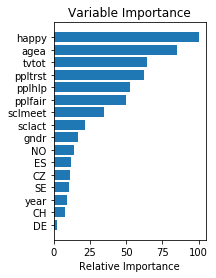

In [55]:
# We'll make 3000 iterations, use 2-deep trees, and set our loss function to 'deviance'.
params = {'n_estimators': 3000,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

By increasing the number of estimators, our model is performing a little better! All percent error types have dropped, aside from the type I errors in our test dataset. This percentage increased by about one percent.

Also, this model ranks happiness as the most important feature, then age. Very interesting. This model's weak learners split the data by happiness more often then by age. 

Next let's change the loss function from 'deviance' to 'exponential'.

Training set accuracy:
Percent Type I errors: 0.049099836333878884
Percent Type II errors: 0.16775777414075285

Test set accuracy:
Percent Type I errors: 0.07239263803680981
Percent Type II errors: 0.18159509202453988


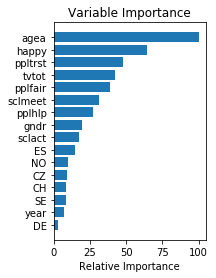

In [58]:
# We'll make 1000 iterations, use 2-deep trees, and set our loss function to 'exponential'.
params = {'n_estimators': 1000,
          'max_depth': 2,
          'loss': 'exponential'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Training set accuracy:
Percent Type I errors: 0.04814511729405346
Percent Type II errors: 0.16530278232405893

Test set accuracy:
Percent Type I errors: 0.06993865030674846
Percent Type II errors: 0.19386503067484662


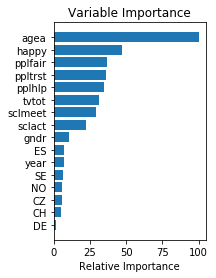

In [43]:

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 1000,
          'subsample': 0.5,
          'learning_rate': 0.1,
          'max_depth': 2,
          'loss': 'exponential'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


This model with the 'exponential' loss function is a bit less accurate overall. I does rank age as the primary feature. Happiness, the second most important feature, is used half as frequently. 

Let's try us involving some more parameters.

Training set accuracy:
Percent Type I errors: 0.03887070376432079
Percent Type II errors: 0.13161483906164756

Test set accuracy:
Percent Type I errors: 0.08711656441717791
Percent Type II errors: 0.18159509202453988


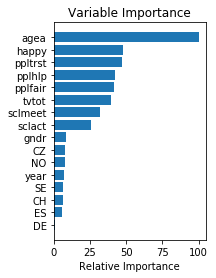

In [60]:
# We'll make 5000 iterations, use 2-deep trees, and set our loss function to 'deviance'. 
# We will also try using subsamples of 0.5 to train each weak learner, and use a learning rate of 0.1.
params = {'n_estimators': 5000,
          'subsample': 0.5,
          'learning_rate': 0.1,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


This seems to be overfitting to our training set. It's accuracy on the training set is some of the best we have seen, but its accuracy on the testing data is rather low.

Let's return to our more simple model but use a tree depth of 3 instead.

Training set accuracy:
Percent Type I errors: 0.029187124931805784
Percent Type II errors: 0.1373431533006001

Test set accuracy:
Percent Type I errors: 0.08466257668711656
Percent Type II errors: 0.18527607361963191


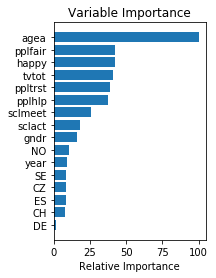

In [61]:
# We'll make 1000 iterations, use 3-deep trees, and set our loss function to 'deviance'.
params = {'n_estimators': 1000,
          'max_depth': 3,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

We seem to have some overfitting. Our accuracy on the training data is good, but not so much on the testing.

Let's investigate how the number of estimators affects the accuracy of our data. We can use a simple model with a tree depth of 2 and 'deviance' as the loss function. We will make a plot of accuracy vs number of estimators. 

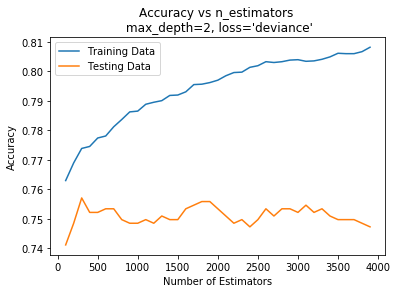

In [85]:
train_errors_total = []
test_errors_total = []
n_values = []
for n in range(100, 4000, 100):
    
    params = {'n_estimators': n,
              'max_depth': 2,
              'loss': 'deviance'}

    # Initialize and fit the model.
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

    # Getting accuracy 
    table_train = pd.crosstab(y_train, predict_train, margins=True)
    table_test = pd.crosstab(y_test, predict_test, margins=True)

    train_errors = (table_train.loc[0.0,1.0] + table_train.loc[1.0,0.0])/ table_train.loc['All','All']
    test_errors = (table_test.loc[0.0,1.0] + table_test.loc[1.0,0.0])/table_test.loc['All','All']
    
    train_errors_total.append(1 - train_errors)
    test_errors_total.append(1 - test_errors)
    n_values.append(n)

    
plt.plot(n_values, train_errors_total)
plt.plot(n_values, test_errors_total) 
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend(['Training Data', 'Testing Data'])
plt.title('Accuracy vs n_estimators \n max_depth=2, loss=\'deviance\'')
plt.show()      

As we can see from the plot, the number of esitmators does not change the accuracy of our model dramatically. The testing accuracy stays roughly the same. The training accuracy improves as the number of estimators increases. Is this concidered overfitting. Our model is not performing worse on the testing data, just better on the training data.

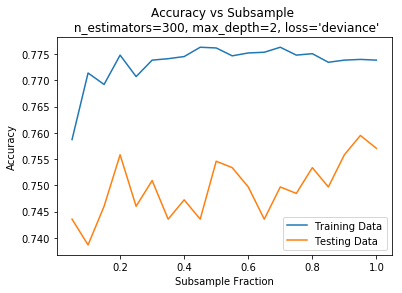

In [87]:
train_errors_total = []
test_errors_total = []
s_values = []
for s in range(1, 21):
    
    params = {'n_estimators': 300,
              'max_depth': 2,
              'subsample': s/20,
              'loss': 'deviance'}

    # Initialize and fit the model.
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

    # Getting accuracy 
    table_train = pd.crosstab(y_train, predict_train, margins=True)
    table_test = pd.crosstab(y_test, predict_test, margins=True)

    train_errors = (table_train.loc[0.0,1.0] + table_train.loc[1.0,0.0])/ table_train.loc['All','All']
    test_errors = (table_test.loc[0.0,1.0] + table_test.loc[1.0,0.0])/table_test.loc['All','All']
    
    train_errors_total.append(1 - train_errors)
    test_errors_total.append(1 - test_errors)
    s_values.append(s/20)
    
    
plt.plot(s_values, train_errors_total)
plt.plot(s_values, test_errors_total) 
plt.xlabel('Subsample Fraction')
plt.ylabel('Accuracy')
plt.legend(['Training Data', 'Testing Data'])
plt.title('Accuracy vs Subsample \n n_estimators=300, max_depth=2, loss=\'deviance\'')
plt.show()      

It seems like a larger subsample is best. When subsample is 1 (i.e. training the trees on all the data) we have a higher accuracy for the testing data. Lower values for subsample leave us with slightly lower accuracy scores. Maybe if we increase the number of estimators from 300 to 800, we will see a clearer trend.

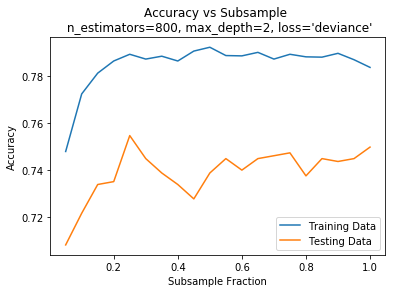

In [90]:
train_errors_total = []
test_errors_total = []
s_values = []
for s in range(1, 21):
    
    params = {'n_estimators': 800,
              'max_depth': 2,
              'subsample': s/20,
              'loss': 'deviance'}

    # Initialize and fit the model.
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

    # Getting accuracy 
    table_train = pd.crosstab(y_train, predict_train, margins=True)
    table_test = pd.crosstab(y_test, predict_test, margins=True)

    train_errors = (table_train.loc[0.0,1.0] + table_train.loc[1.0,0.0])/ table_train.loc['All','All']
    test_errors = (table_test.loc[0.0,1.0] + table_test.loc[1.0,0.0])/table_test.loc['All','All']
    
    train_errors_total.append(1 - train_errors)
    test_errors_total.append(1 - test_errors)
    s_values.append(s/20)
    
    
plt.plot(s_values, train_errors_total)
plt.plot(s_values, test_errors_total) 
plt.xlabel('Subsample Fraction')
plt.ylabel('Accuracy')
plt.legend(['Training Data', 'Testing Data'])
plt.title('Accuracy vs Subsample \n n_estimators=800, max_depth=2, loss=\'deviance\'')
plt.show() 

The trend has not changed much. What is interesting is that large spike near 0.25. I assume if we were using cross validation instead of just one testing dataset, this spike would calm down. It is not that large of a spike concidering it still stays within the general range of accuracy values we see for the testing data. 

Let's see what happend when we vary the learning rate, while keeping other parameters constant

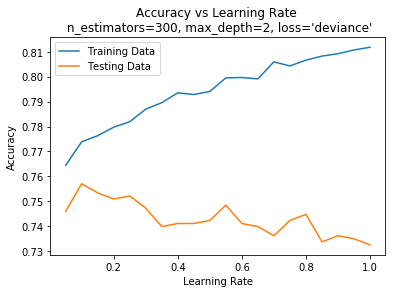

In [93]:
train_errors_total = []
test_errors_total = []
l_values = []
for l in range(1, 21):
    
    params = {'n_estimators': 300,
              'max_depth': 2,
              'learning_rate': l/20,
              'loss': 'deviance'}

    # Initialize and fit the model.
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

    # Getting accuracy 
    table_train = pd.crosstab(y_train, predict_train, margins=True)
    table_test = pd.crosstab(y_test, predict_test, margins=True)

    train_errors = (table_train.loc[0.0,1.0] + table_train.loc[1.0,0.0])/ table_train.loc['All','All']
    test_errors = (table_test.loc[0.0,1.0] + table_test.loc[1.0,0.0])/table_test.loc['All','All']
    
    train_errors_total.append(1 - train_errors)
    test_errors_total.append(1 - test_errors)
    l_values.append(l/20)
    
    
plt.plot(s_values, train_errors_total)
plt.plot(s_values, test_errors_total) 
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend(['Training Data', 'Testing Data'])
plt.title('Accuracy vs Learning Rate \n n_estimators=300, max_depth=2, loss=\'deviance\'')
plt.show()        

Well, a lower learning rate seems to yield a slightly higher testing accuracy. As for the training accuracy, a larger learning rate is best. A learning rate of one, is equivalent to having no learning rate. It seems increasing the learning rate tends toward overfitting. 

# Conclusion

It seems to me that varying the parameters did not affect the accuracy of our model much. We tried varying them all and only saw a one or two percent change in our overall testing accuracy. To better understand the nature of these parameters' effect of accuracy, plotting cross validation scores vs the parameters would be helpful.

It would also be informative to of course try these models on other data. The effect we are observing are certainly related to the dataset we are using. Trying other datasets would give us a more general understanding of what is going on. 